In [ ]:
#Linear Algebra Execution

In [3]:
#Import necessary libraries
import numpy as np
import scipy as sc
#Define the coefficient matrix A
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)
#Define the right-hand side vector b
b = np.array([[10],[8],[3]])
print(b)
#Calculate the inverse of A and multiply by b to find the solution vector
C = sc.linalg.inv(A).dot(b)
print(C)

[[1 3 5]
 [2 5 1]
 [2 3 8]]
[[10]
 [ 8]
 [ 3]]
[[-9.28]
 [ 5.16]
 [ 0.76]]


In [4]:
#Import necessary libraries
import numpy as np
import scipy as sc
#Define the coefficient matrix A
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)
#Define the right-hand side vector b
b = np.array([[10],[8],[3]])
print(b)
#Alternatively, use the solve function to find the solution vector directly
D = sc.linalg.solve(A,b)
print(D)

[[1 3 5]
 [2 5 1]
 [2 3 8]]
[[10]
 [ 8]
 [ 3]]
[[-9.28]
 [ 5.16]
 [ 0.76]]


In [ ]:
#Linear Algebra Example 2:

In [5]:
import numpy as np
from scipy.linalg import solve
#Coefficients matrix
A = np.array([[3,2],[1,2]])
#Constants vector
b = np.array([1,0])
#Using the solve function to find the solution to the system of equations
solution = solve(A,b)
solution

array([ 0.5 , -0.25])

In [ ]:
#Solving Ordinary Differential Equations (ODE)

In [11]:
#Python program to implement Runge Kutta method
#A sample differential equation "dy/dx=(x-y)/2"
def dydx(x,y):
    return ((x-y)/2)

#Finds value of y of a given x using step size h
#and initial value y0 at x0.
def rungeKutta(x0,y0,x,h):
    #Count number of iterations using step size or
    #step height
    n = int((x-x0)/h)
    #Iterate for number of iterations
    y = y0
    for i in range(1,n+1):
        #Apply Runge Kutta Formulas to find next value of y
        k1 = h*dydx(x0,y)
        k2 = h*dydx(x0+0.5*h,y+0.5*k1)
        k3 = h*dydx(x0+0.5*h,y+0.5*k2)
        k4 = h*dydx(x0+h, y+k3)
        
        #Update next value of y
        y = y+(1.0/6.0)*(k1+2*k2+2*k3+k4)
        
        #Update next value of x
        x0 = x0+h
    return y

#Driver method
x0 = 0
y = 1
x = 5
h = 0.2
print('The value of y at x is: ', rungeKutta(x0,y,x,h))

The value of y at x is:  3.246255553543053


In [29]:
#Python program to implement Runge Kutta method
#A sample differential equation "dy/dx=(x-y)/2"
def dydx(x,y):
    return ((x-y)/2)

#Finds value of y of a given x using step size h
#and initial value y0 at x0.
def rungeKutta(x0,y0,x,h):
    #Count number of iterations using step size or
    #step height
    n = int((x-x0)/h)
    #Iterate for number of iterations
    y = y0
    for i in range(1,n+1):
        #Apply Runge Kutta Formulas to find next value of y
        k1 = dydx(x0,y)
        k2 = dydx(x0+0.5*h,y+(0.5*k1*h))
        k3 = dydx(x0+0.5*h,y+(0.5*k2*h))
        k4 = dydx(x0+h, y+k3*h)
        
        #Update next value of y
        y = y+(1.0/6.0)*(k1+2*k2+2*k3+k4)
        
        #Update next value of x
        x0 = x0+h
    return y

#Driver method
x0 = 0
y = 1
x = 5
h = 0.2
print('The value of y at x is: ', rungeKutta(x0,y,x,h))

The value of y at x is:  1.64877306711193


In [ ]:
#Pressure Profile in a Vessel

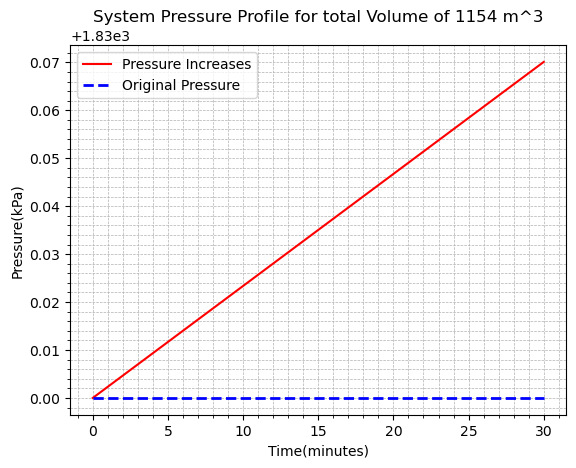

In [19]:
#Importing necessary libraries
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

#parameter values for original SEIR
V = 1154 # m3
R = 8.314 # R[J/mol*K)]
T = 120 #℃

mass_in = 473220 #kg/hr
MW_in = 56.6
mass_out = 28742 #kg/hr
MW_out = 40.4

#calculation, time in minutes
Tk = T+273.15 #Convert to Kelvin
mol_in = mass_in/MW_in/60 #kmol/min
mol_out = mass_out/MW_out/60 #kmol/min

#initial condition
P0 = 1830 #kPa

#differential equation using ideal gas
def dPdt(P,t):
    #the differential equations
    dpdt = (mol_in - mol_out)/(V/R*Tk)
    
    return dpdt
#create the x axis for the integration
#time to response is 20 minutes
start = 0
end = 30
t = np.linspace(start, end,end)

Pinitial = np.linspace(P0,P0,end)

#integration of the differential equation
P = sc.integrate.odeint(dPdt,P0,t)

#Plotting the results
plt.figure()
plt.plot(t,P,'r',label='Pressure Increases')
plt.plot(t,Pinitial,'b--',label='Original Pressure',linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V} m^3')
plt.xlabel('Time(minutes)')
plt.ylabel('Pressure(kPa)')
plt.grid(True,which='both',linestyle='--',linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

In [ ]:
#Modeling a Zombie Apocalypse

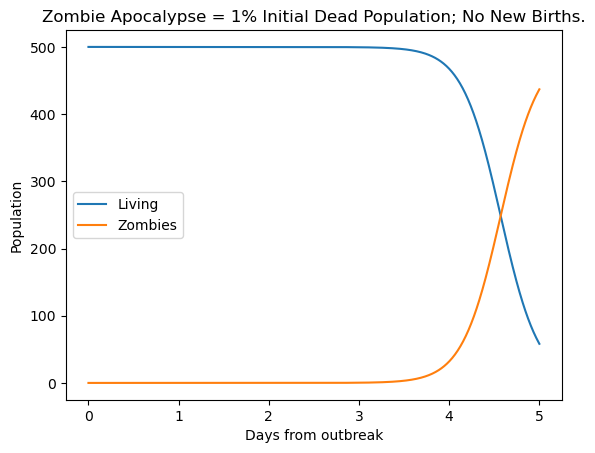

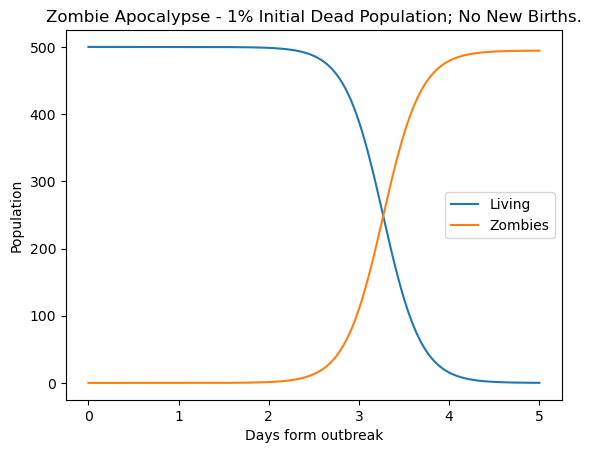

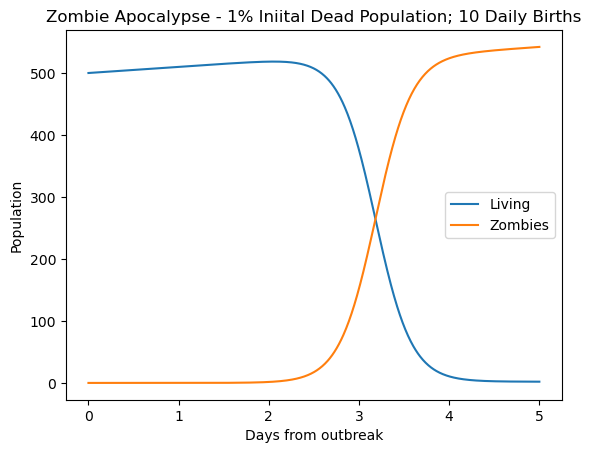

In [28]:
#Importing the necessary libraries for numerical compututations and plotting

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint #Import odeint from scipy.integrate

#Parameters for the model, representing various rates per day
P = 0 #Birth rate (new individuals per day)
d = 0.0001 #Natural death percent (probability of dying each day)
B = 0.0095 #Transmission percent (probability of a living becoming a zombie each day)
G = 0.0001 #Resurrect percent (probability of a dead becoming zombie each day)
A = 0.0001 #Destroy percent (probability of a zombie being destroyed each day)

#The system of differential equations: y is the vectoe of populations, t is time
def f(y,t):
    Si = y[0] #Suspectible (living) population
    Zi = y[1] #Zombie population
    Ri = y[2] #Removed (dead) population
    #Model equations for the rates of change of each population 
    f0 = P-B*Si*Zi-d*Si #Rate of change of living
    f1 = B*Si*Zi+G*Ri-A*Si*Zi #Rate of change of zombies
    f2 = d*Si+A*Si*Zi-G*Ri #Rate of change of dead
    return [f0,f1,f2]

#Initial conditions for the model
S0 = 500.0 #Initial population of living
Z0 = 0 #Initial zombie population
R0 = 0 #Initial dead population
y0 = [S0,Z0,R0] #Vector of initial conditions
t = np.linspace(0,5,1000) #Time grid for the simulation (0 to 5 days,1000 points)

#Solving the differential equations over time t, starting from initial conditions y0
soln = odeint(f,y0,t) #Solving the DEs again with new initial conditions
S = soln[:,0] #Extracting the solution for living 
Z = soln[:,1] #Extraxting the solution for zombies
R = soln[:,2] #Extracting the solution for dead

#Plotting the results for the initial scenario
plt.figure()
plt.plot(t,S,label='Living')
plt.plot(t,Z,label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse = 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()

#Changing the initial conditions for a scenario with 1% initial dead population
R0 = 0.01*S0 #1% of the initial population is dead
y0 = [S0,Z0,R0] #Updating the initial conditions
soln = odeint(f,y0,t) #Solving the DEs again with new initial conditions
S = soln[:,0]
Z = soln[:,1]
R = soln[:,2]

#Plotting the results for the second scenario
plt.figure()
plt.plot(t,S,label='Living')
plt.plot(t,Z,label='Zombies')
plt.xlabel('Days form outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()

#Updating the parameters fir the third scenario with daily births
P = 10 #10 new births daily
y0 = [S0,Z0,R0] #Initial conditions remain the same as the second scenario
soln = odeint(f,y0,t) #Solving the DEs with the new birth rate
S = soln[:,0]
Z = soln[:,1]
R = soln[:,2]

#Plotting the results for the third scenario
plt.figure()
plt.plot(t,S,label='Living')
plt.plot(t,Z,label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Iniital Dead Population; 10 Daily Births')
plt.legend(loc=0)
plt.show()